In [120]:
import pandas, seaborn, scipy, numpy, matplotlib, collections

%matplotlib inline
from matplotlib import pyplot

# Constants
library_sizes = {
    'WGS': 3002000000,
    'WES': 50160183,
}
mhc_binding_threshold_affinity = 500



%matplotlib inline
%config InlineBackend.figure_format = 'png'

matplotlib.rc("savefig", dpi=800)
#matplotlib.rc("savefig", dpi=72)
#matplotlib.rc('text', usetex=False)
#reload(c)

def print_full(x):
    pandas.set_option('display.max_rows', len(x))
    print(x)
    pandas.reset_option('display.max_rows')

,Cisplatin,Signature 1,Signature 3,Signature 4,Signature 5,Signature 6,Signature 7,Signature 8,Signature 10,Signature 11,Signature 13,Signature 15,Signature 18,Signature 20,Signature 21,Signature 23,Signature 24,Signature 25,Signature 26,Signature 29
AOCS-034-13 new,0.000000,0.296900,0.358497,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0.107511,0.000000,0.00000,0.00000,0.000000,0.093438,0.000000,0.00000,0,0.000000
AOCS-064-13 new,0.000000,0.215773,0.493527,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0,0.080150
AOCS-065-13 new,0.000000,0.446555,0.374582,0.068627,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.071972,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0,0.000000
AOCS-086-13 new,0.000000,0.350738,0.320231,0.087138,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.106142,0.000000,0.00000,0,0.000000
AOCS-088-13 new,0.000000,0.268014,0.380697,0.098979,0,0.000000,0,0.100981,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0,0.000000
AOCS-091-13 new,0.000000,0.425834,0.351360,0.072657,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0,0.000000
AOCS-092-13 new,0.000000,0.231702,0.112244,0.205124,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.168761,0.000000,0.00000,0,0.000000
AOCS-093-13 new,0.000000,0.228397,0.381853,0.102654,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0,0.000000
AOCS-094-2 new,0.000000,0.345845,0.494803,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0,0.000000
AOCS-095-13 new,0.000000,0.388305,0.283115,0.151009,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0,0.000000


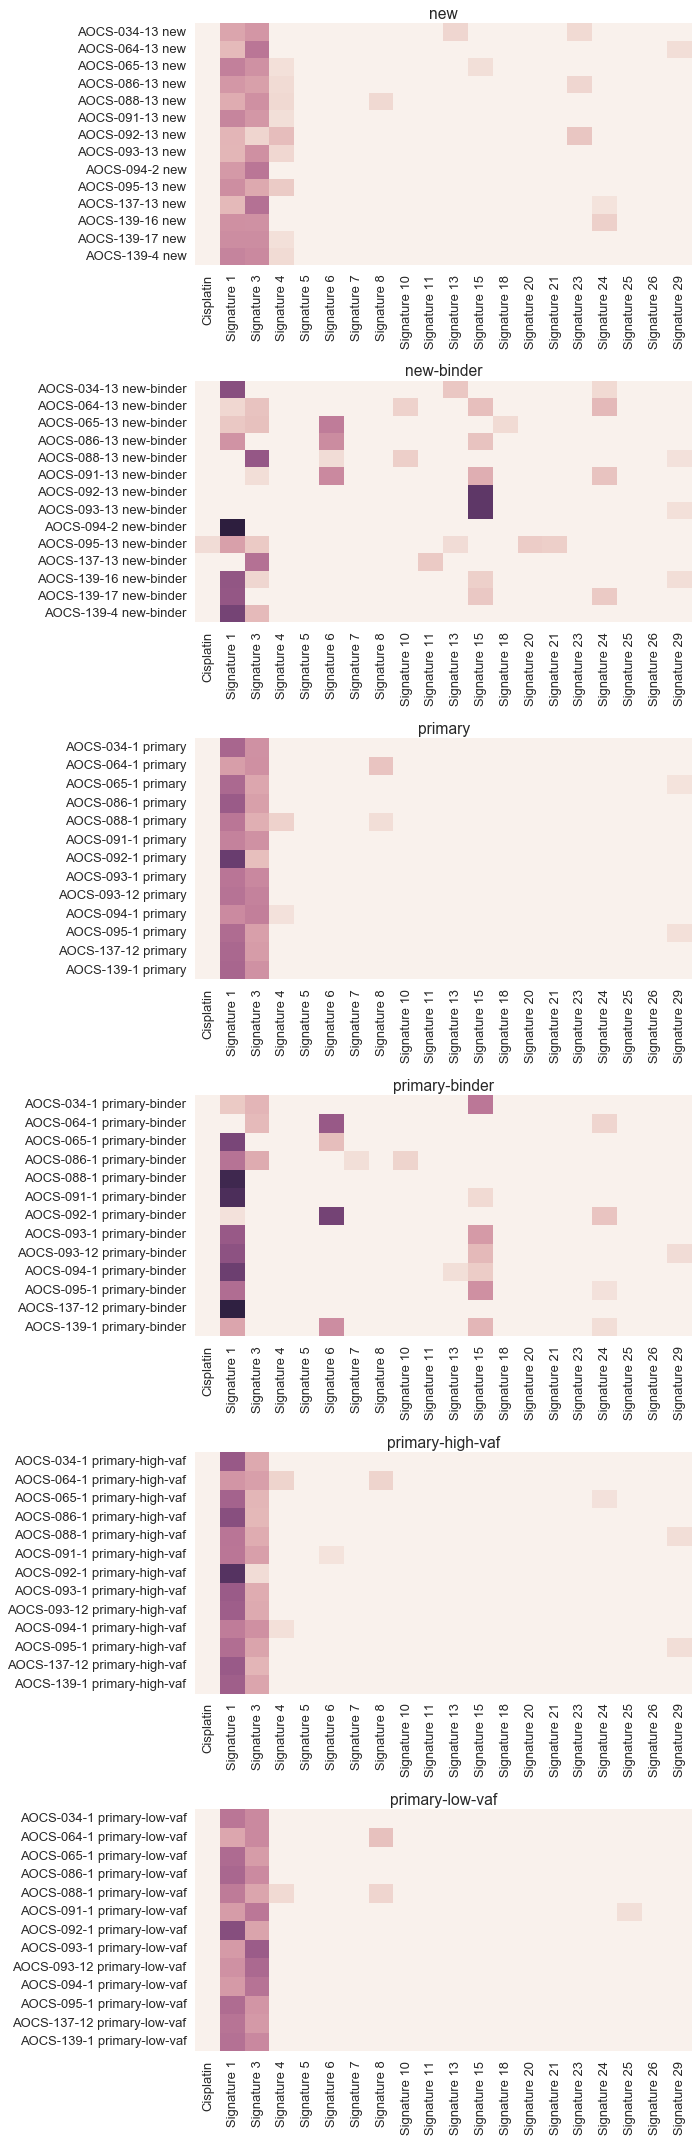

In [42]:
# deconstructSigs R package output
fig = pyplot.figure(figsize=(10,30))
deconstruct_sigs = pandas.read_csv("../data/deconstructsigs_output_extended.csv").fillna(0)
deconstruct_sigs.index = deconstruct_sigs.Sample
del deconstruct_sigs["Sample"]
del deconstruct_sigs["Unnamed: 0"]
deconstruct_sigs = deconstruct_sigs.ix[sorted(deconstruct_sigs.index, key=lambda x: (x.split()[-1], x))]
deconstruct_sigs = deconstruct_sigs[[x for x in deconstruct_sigs.columns if deconstruct_sigs[x].sum() > 0]]
#deconstruct_sigs = deconstruct_sigs.ix[deconstruct_sigs.index.str.startswith("AOCS")]

deconstruct_sigs.index = [(x.split("/")[0] + " " + x.split(" ")[1]).strip() for x in deconstruct_sigs.index]

deconstruct_sigs = deconstruct_sigs.ix[deconstruct_sigs.index.str.contains("AOCS")]

deconstruct_sigs_dict = {}
seaborn.set_context('talk')
#pyplot.title("A", loc="left")
keys = sorted(set(x.split()[-1] for x in deconstruct_sigs.index))
ax1 = pyplot.subplot(2, 1, 1)

for (i, key) in enumerate(keys):
    ax = pyplot.subplot(len(keys), 1, i + 1, sharex=ax1)
    pyplot.title(key)
    sub_decontructsigs = deconstruct_sigs.ix[deconstruct_sigs.index.str.endswith(key)]
    deconstruct_sigs_dict[key] = sub_decontructsigs
    seaborn.heatmap(sub_decontructsigs, vmin=0, vmax=1.0, cbar=False)
pyplot.setp(ax1.get_xticklabels(), visible=False)

#ax2 = pyplot.subplot(2, 1, 2, sharex=ax1)
#pyplot.title("Unique to recurrence", loc="left")
#pyplot.title("B", loc="left")

#seaborn.heatmap(deconstruct_sigs.ix[ ~ deconstruct_sigs.index.str.contains("primary")], vmin=0, vmax=1.0, cbar=False)
#seaborn.heatmap(deconstruct_sigs)

#deconstruct_sigs
pyplot.tight_layout()

deconstruct_sigs



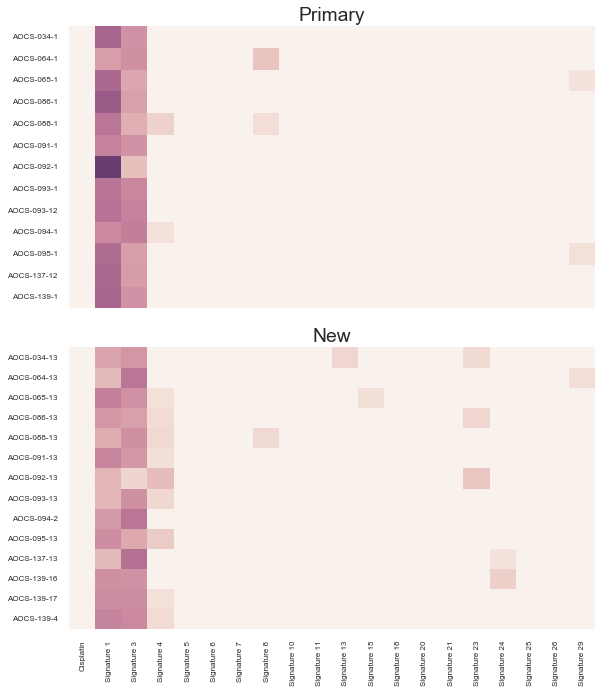

In [115]:
def abbreviated_source_display_name(name):
    return (name.split('/')[0]
            .replace("primary_", "")
            .replace("secondary_", "")
            .replace("left", "L")
            .replace("right", "R")
            .replace("pelvic_sidewalls", "sidewalls")
            .replace("end_of_care", "final"))

#seaborn.set_context("paper")
seaborn.set_context('poster')

seaborn.set_style("whitegrid")

#pyplot.figure(figsize=(6,6))
pyplot.figure(figsize=(10,10))

grid=(2,5)

#cbar_ax = pyplot.subplot2grid(grid,(0, 0))

ax = pyplot.subplot2grid(grid,(0, 1), colspan=grid[1]-1)
pyplot.title("Primary")
sub_decontructsigs = deconstruct_sigs.ix[deconstruct_sigs.index.str.endswith(" primary")]
sub_decontructsigs.index = [abbreviated_source_display_name(x.split()[0]) for x in sub_decontructsigs.index]
seaborn.heatmap(sub_decontructsigs, vmin=0, vmax=1.0, cbar=False, cbar_ax=cbar_ax, xticklabels=False)
pyplot.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
pyplot.tick_params(axis='both', which='major', labelsize=8)


ax = pyplot.subplot2grid(grid,(1, 1), colspan=grid[1]-1, sharex=ax)
sub_decontructsigs = deconstruct_sigs.ix[deconstruct_sigs.index.str.endswith(" new")]
sub_decontructsigs.index = [abbreviated_source_display_name(x.split()[0]) for x in sub_decontructsigs.index]
seaborn.heatmap(sub_decontructsigs, vmin=0, vmax=1.0, cbar=False)
pyplot.title("New")
pyplot.tick_params(axis='both', which='major', labelsize=8)

pyplot.tight_layout()

pyplot.savefig("../figures/signtures.pdf")



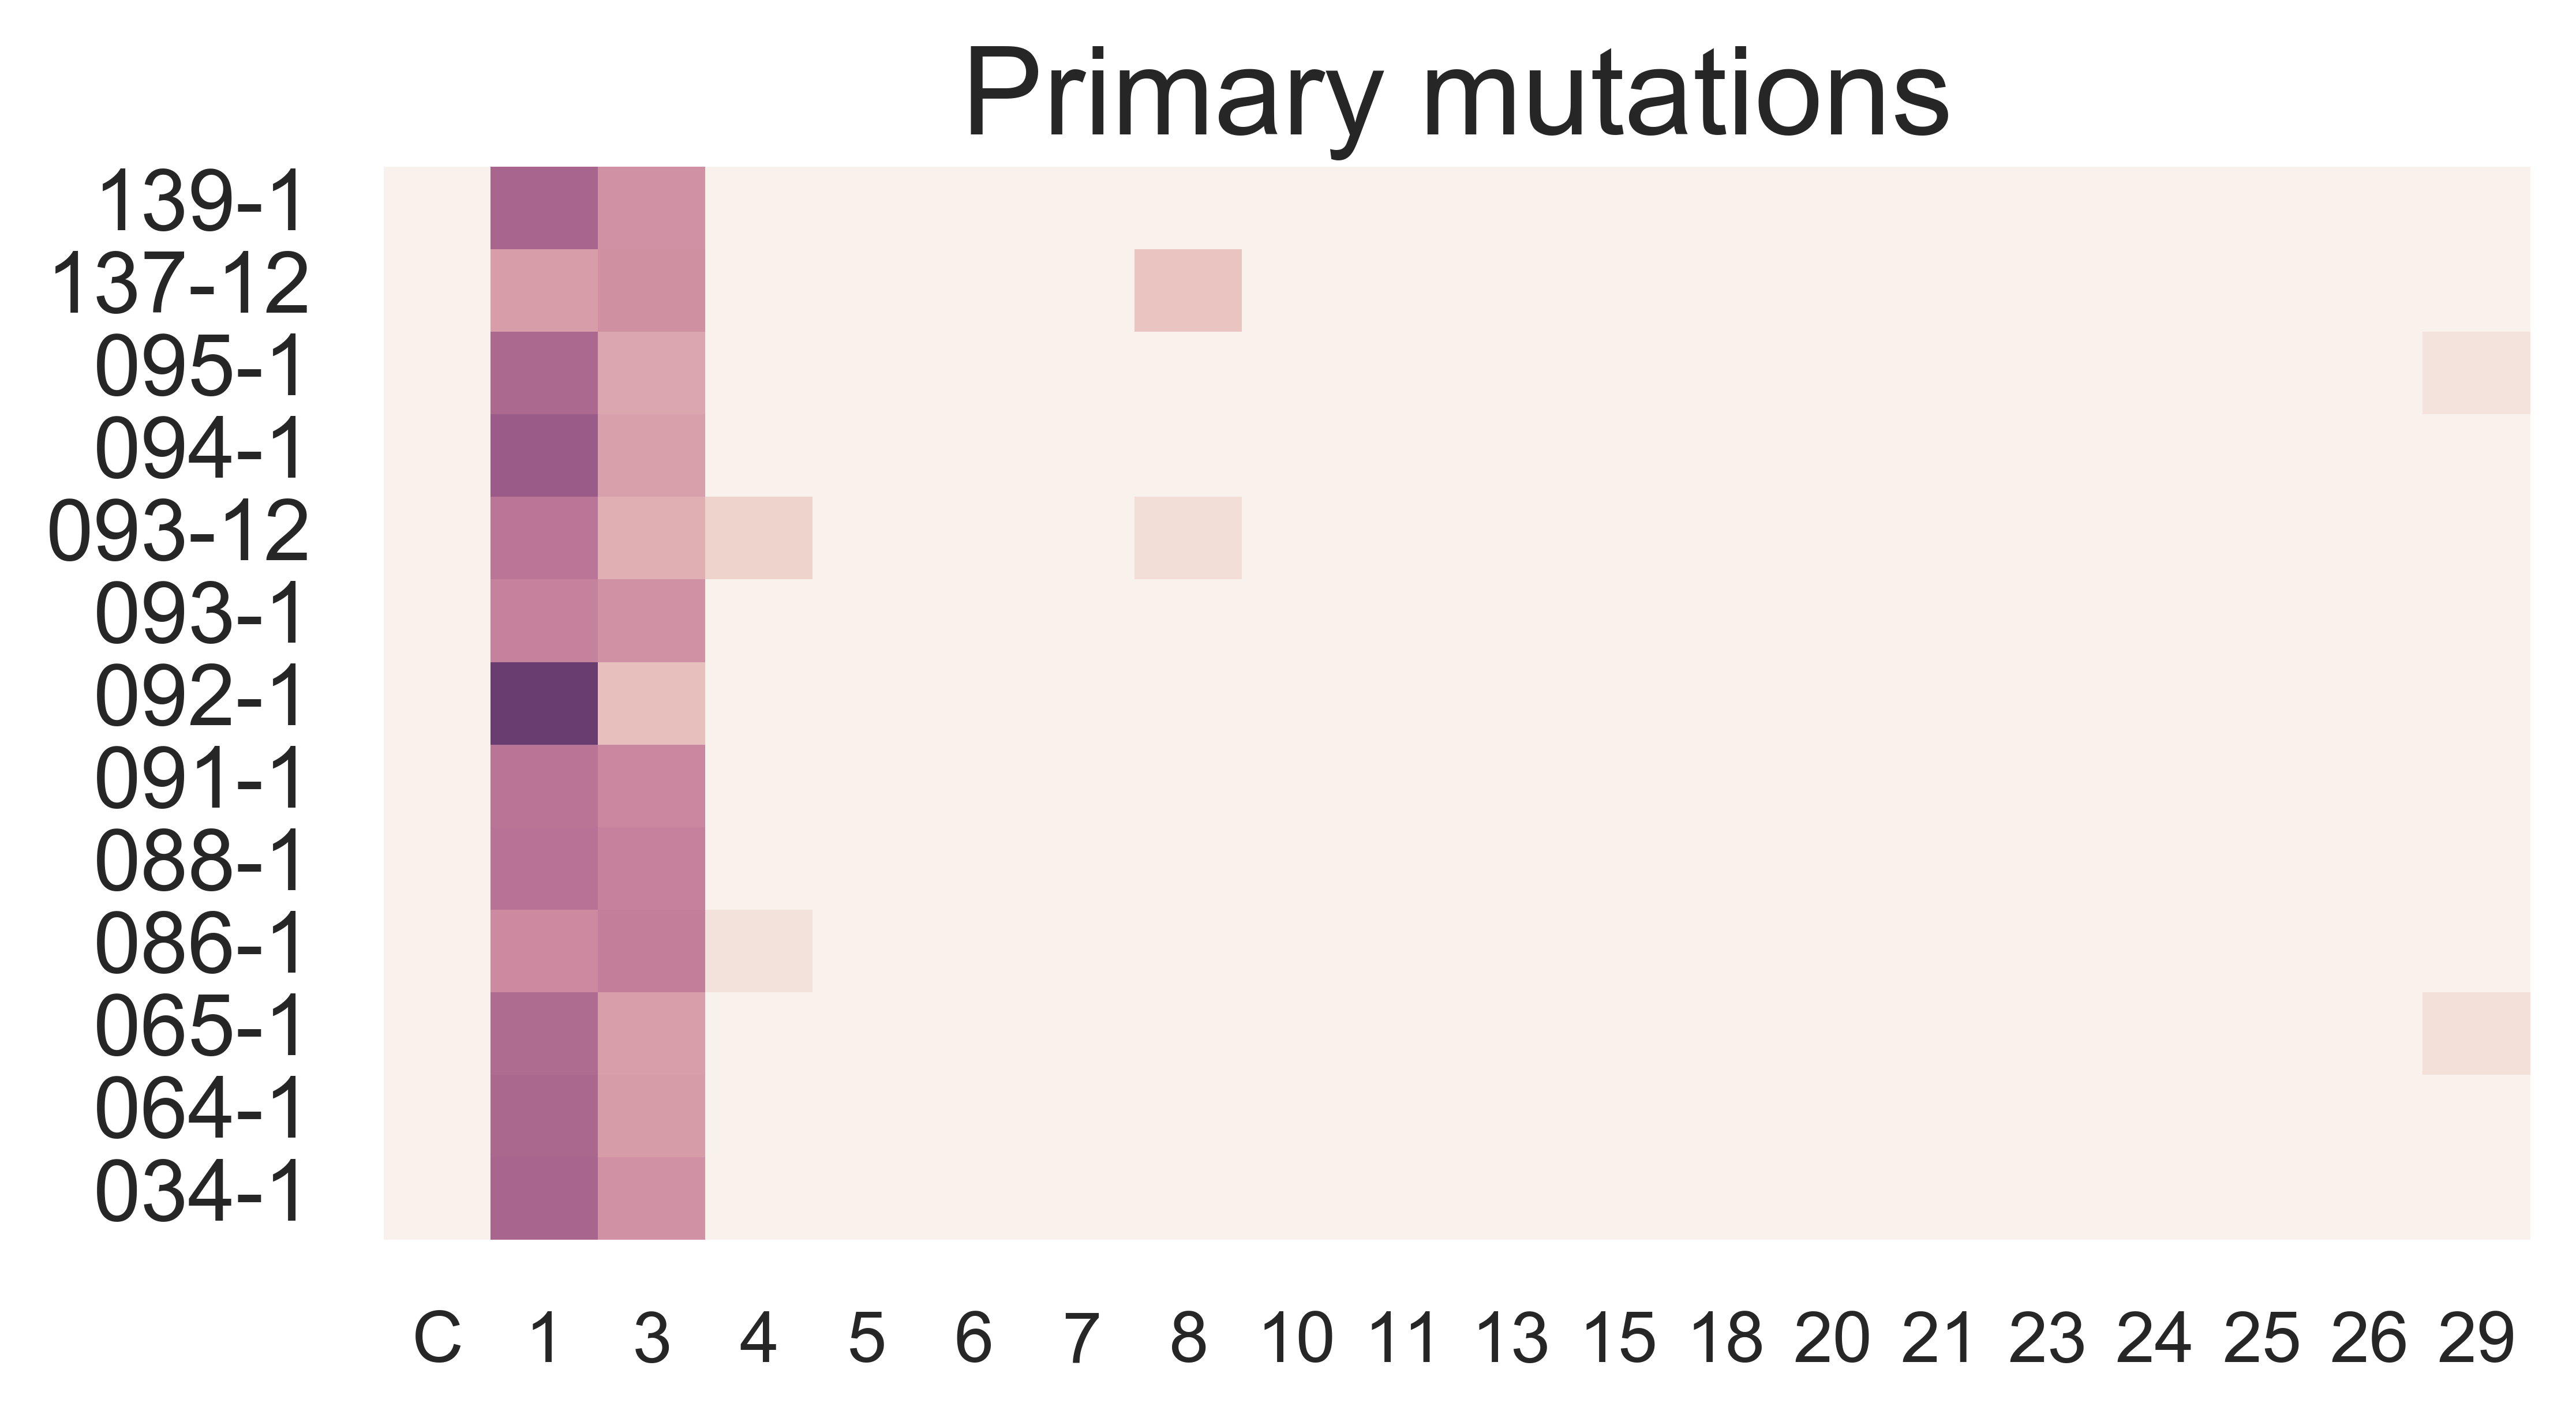

In [137]:
seaborn.set_context('poster')
pyplot.figure(figsize=(6,3))
sub_decontructsigs = deconstruct_sigs.ix[deconstruct_sigs.index.str.endswith(" primary")]
sub_decontructsigs.index = [abbreviated_source_display_name(x.split()[0]) for x in sub_decontructsigs.index]
seaborn.heatmap(sub_decontructsigs, vmin=0, vmax=1.0, cbar=False)
pyplot.xticks(
    numpy.arange(len(sub_decontructsigs.columns)) + .5,
    [x.replace("Signature ", "").replace("Cisplatin", "C") for x in sub_decontructsigs.columns],
    fontsize="xx-small",
    rotation=0)
pyplot.yticks(numpy.arange(sub_decontructsigs.shape[0]) + .5,
              [x.replace("AOCS-", "") for x in sub_decontructsigs.index],
             fontsize="x-small")
pyplot.title("Primary mutations")

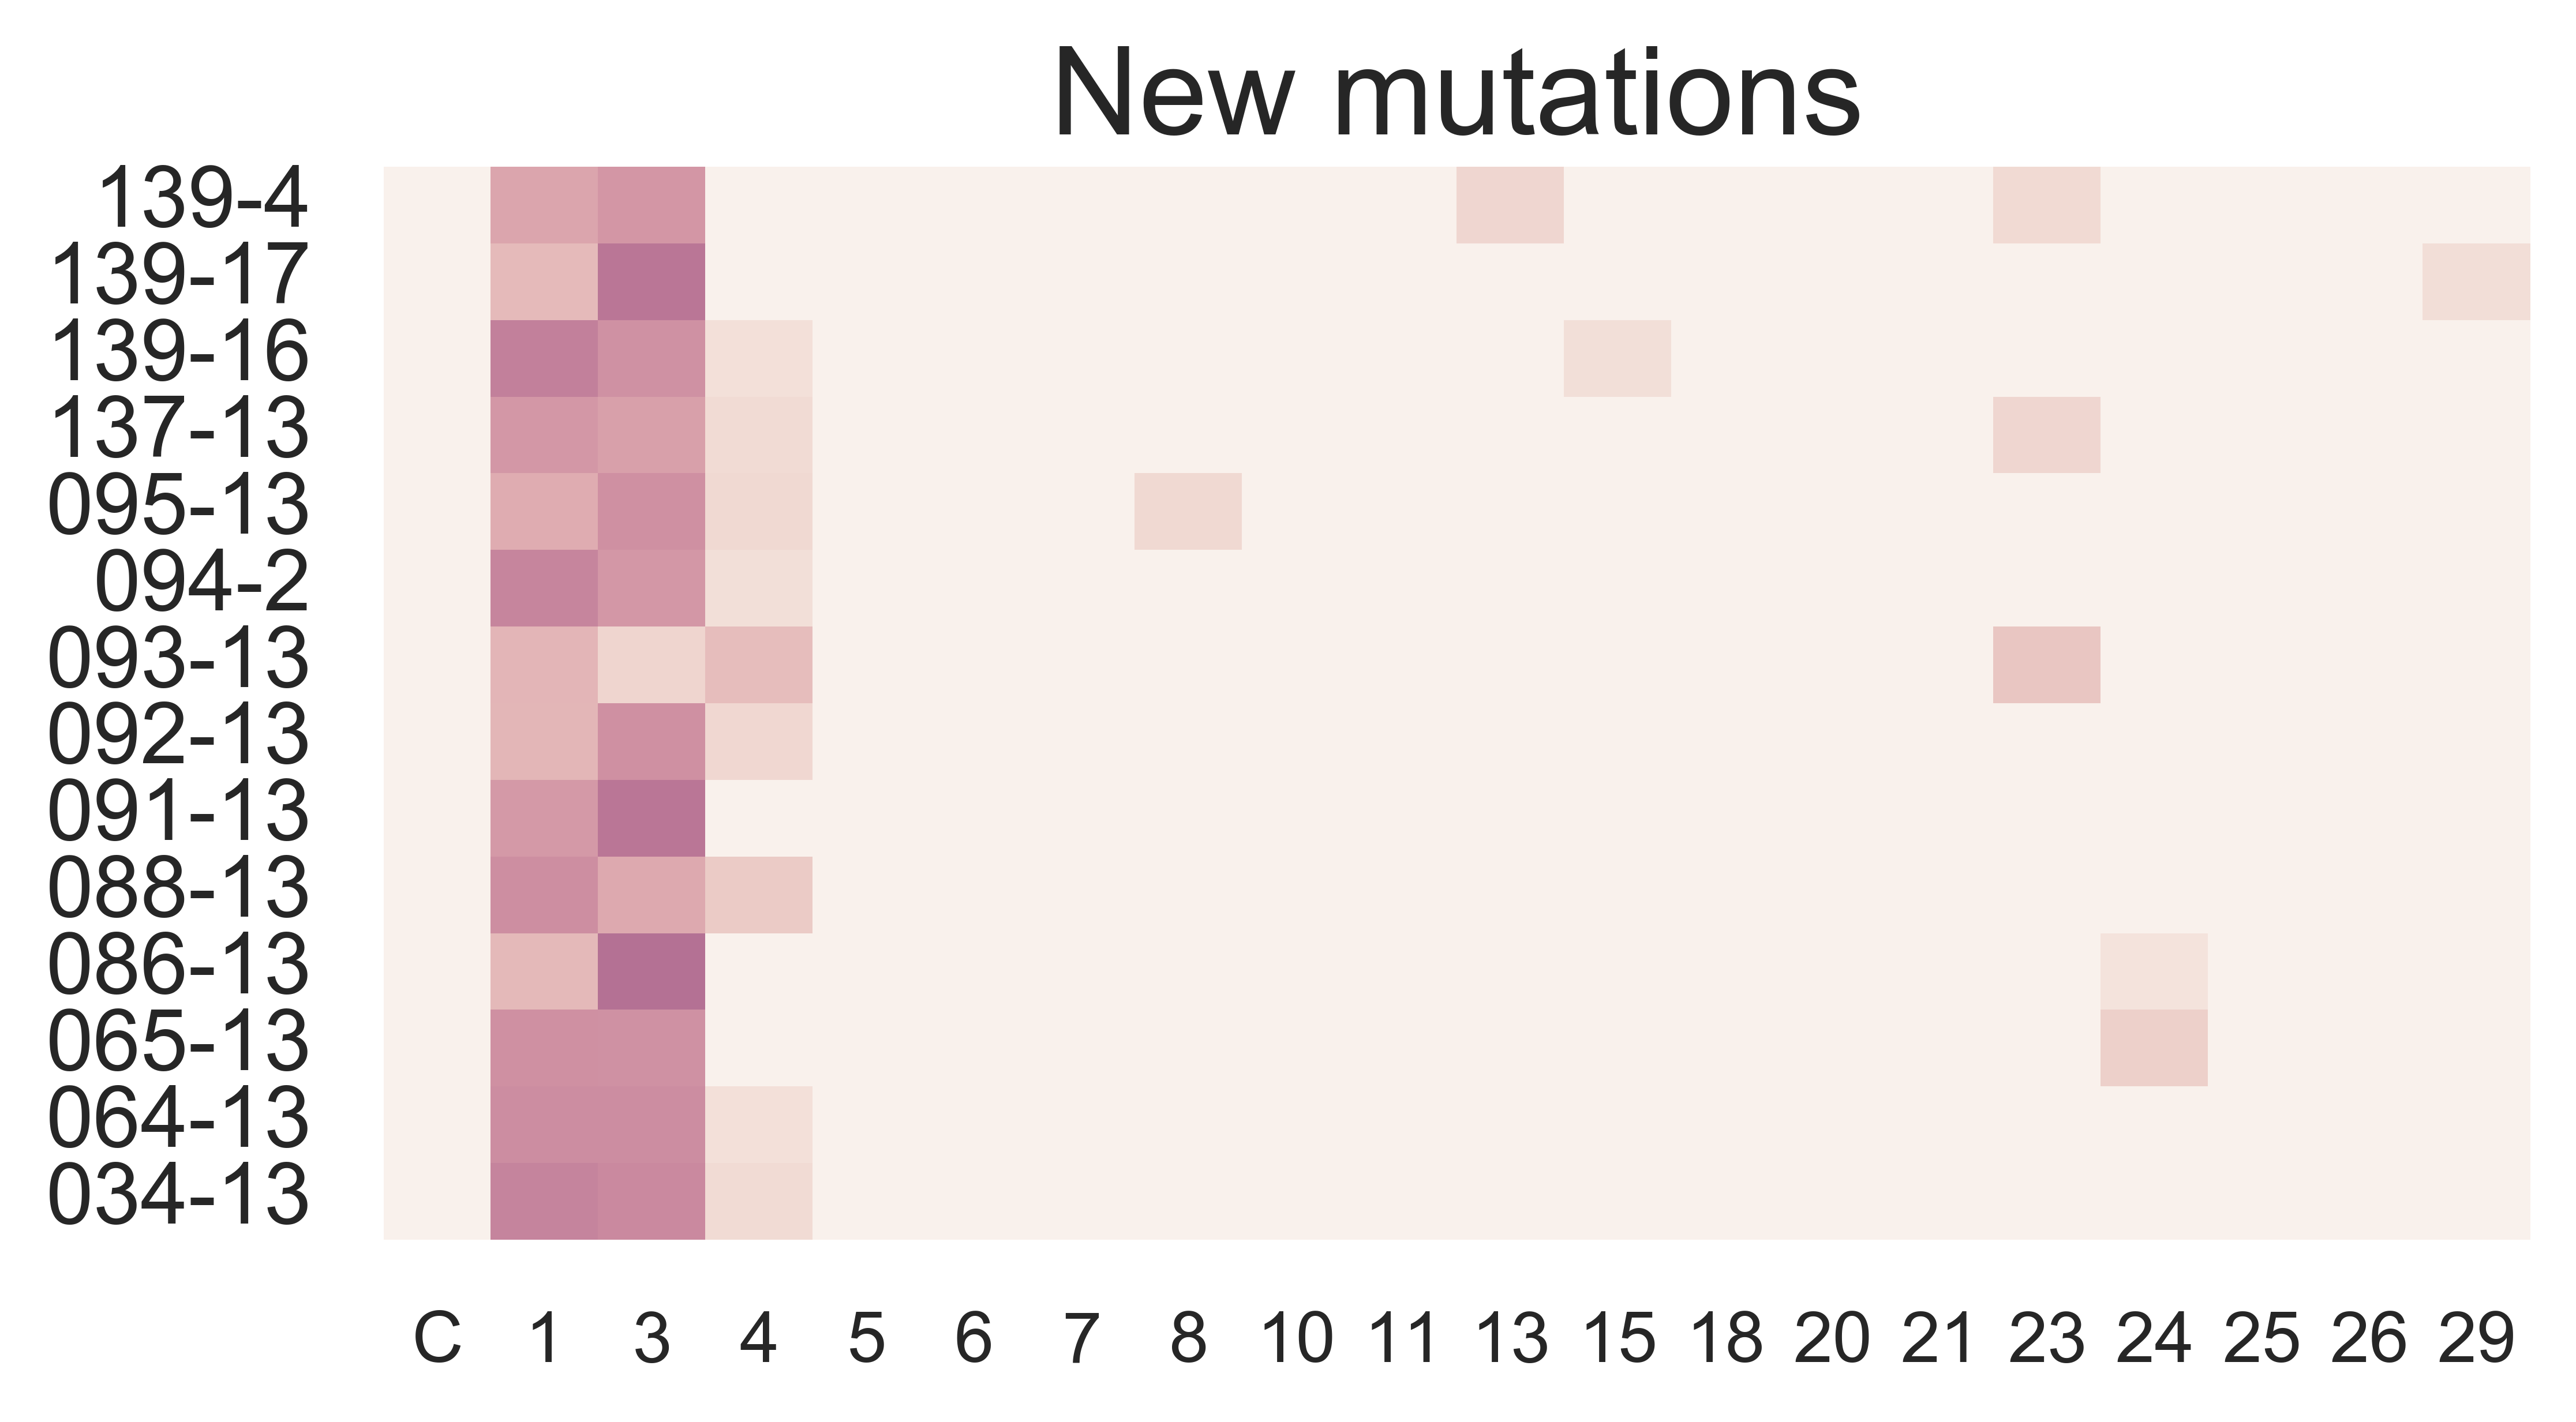

In [136]:
seaborn.set_context('poster')
pyplot.figure(figsize=(6,3))
sub_decontructsigs = deconstruct_sigs.ix[deconstruct_sigs.index.str.endswith(" new")]
sub_decontructsigs.index = [abbreviated_source_display_name(x.split()[0]) for x in sub_decontructsigs.index]
seaborn.heatmap(sub_decontructsigs, vmin=0, vmax=1.0, cbar=False)
pyplot.xticks(
    numpy.arange(len(sub_decontructsigs.columns)) + .5,
    [x.replace("Signature ", "").replace("Cisplatin", "C") for x in sub_decontructsigs.columns],
    fontsize="xx-small",
    rotation=0)
pyplot.yticks(numpy.arange(sub_decontructsigs.shape[0]) + .5,
              [x.replace("AOCS-", "") for x in sub_decontructsigs.index],
             fontsize="x-small")
pyplot.title("New mutations")

In [77]:
all_signatures = pandas.read_csv("../data/all_signatures_for_deconstructsigs.csv", index_col=0)
all_signatures.columns = [c.replace("[", "(").replace("]", ")") for c in all_signatures.columns]
all_signatures

,A(C>A)A,A(C>A)C,A(C>A)G,A(C>A)T,C(C>A)A,C(C>A)C,C(C>A)G,C(C>A)T,G(C>A)A,G(C>A)C,...,C(T>G)G,C(T>G)T,G(T>G)A,G(T>G)C,G(T>G)G,G(T>G)T,T(T>G)A,T(T>G)C,T(T>G)G,T(T>G)T
Signature 1,0.011098,0.009149,1.490070e-03,0.006234,0.006596,0.007342,0.000893,0.007187,0.008233,0.005758,...,0.001600,0.002759,0.000099,2.023656e-04,0.001188,0.000801,1.397554e-03,0.001292,2.031077e-03,0.004030
Signature 2,0.000683,0.000619,9.927896e-05,0.000324,0.000677,0.000214,0.000007,0.000416,0.000352,0.000134,...,0.000228,0.000067,0.000096,4.700238e-05,0.000110,0.000086,7.173695e-05,0.000014,2.066152e-04,0.000024
Signature 3,0.022172,0.017872,2.138340e-03,0.016265,0.018782,0.015760,0.001963,0.014723,0.009697,0.010843,...,0.010465,0.008724,0.004144,4.501985e-03,0.016391,0.007067,5.427184e-03,0.006160,1.107653e-02,0.013001
Signature 4,0.036500,0.030900,1.830000e-02,0.024300,0.046100,0.061400,0.008800,0.043200,0.037600,0.039900,...,0.004600,0.001200,0.000000,0.000000e+00,0.001800,0.000200,0.000000e+00,0.000300,3.000000e-03,0.001100
Signature 5,0.014942,0.008961,2.207846e-03,0.009207,0.009675,0.004952,0.002801,0.011013,0.011892,0.009248,...,0.007147,0.011487,0.001628,3.277349e-04,0.005949,0.003307,5.202874e-03,0.005132,6.055254e-03,0.013370
Signature 6,0.001700,0.002800,5.000000e-04,0.001900,0.010100,0.024100,0.009100,0.057100,0.002400,0.005800,...,0.005000,0.008600,0.000000,1.600000e-03,0.001000,0.003500,9.000000e-04,0.001900,1.100000e-03,0.007200
Signature 7,0.000400,0.000500,0.000000e+00,0.000400,0.001200,0.000600,0.000000,0.001300,0.000300,0.000100,...,0.000900,0.001300,0.000000,0.000000e+00,0.001700,0.000900,0.000000e+00,0.001000,1.000000e-03,0.001400
Signature 8,0.036718,0.033246,2.525311e-03,0.033599,0.031724,0.025505,0.001160,0.028791,0.023682,0.015822,...,0.006604,0.004867,0.000975,5.248216e-04,0.006088,0.005427,1.743221e-03,0.002550,6.030395e-03,0.007224
Signature 9,0.012000,0.006700,5.000000e-04,0.006800,0.009800,0.005700,0.000000,0.009100,0.011800,0.009200,...,0.012600,0.050900,0.007200,6.000000e-04,0.005000,0.018500,5.020000e-02,0.008100,8.800000e-03,0.054500
Signature 10,0.000700,0.001000,3.000000e-04,0.009200,0.003100,0.000900,0.000700,0.016000,0.001400,0.002200,...,0.003700,0.018200,0.000000,2.000000e-03,0.000900,0.003000,5.000000e-03,0.009200,2.200000e-03,0.063300


In [54]:
# Annotate mutations to have signature contributions.

mutations = pandas.read_csv("../data/mutations.csv.bz2")

/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [61]:
sources = pandas.read_csv("../data/sources.csv", index_col="source_id")


In [70]:
signature_source_name_canonicalization = dict([
    (("%s new" % s.split("/")[0]), s) for s in sources.index
        if ("%s new" % s.split("/")[0]) in deconstruct_sigs_dict['new'].index
])
signature_source_name_canonicalization.update(dict([
            (("%s primary" % s.split("/")[0]), s) for s in sources.index
        if ("%s primary" % s.split("/")[0]) in deconstruct_sigs_dict['primary'].index
        ]))
signature_source_name_canonicalization
primary_signatures = deconstruct_sigs_dict['primary'].copy()
primary_signatures.index = primary_signatures.index.map(signature_source_name_canonicalization.get)
primary_signatures

new_signatures = deconstruct_sigs_dict['new'].copy()
new_signatures.index = new_signatures.index.map(signature_source_name_canonicalization.get)
new_signatures

,Cisplatin,Signature 1,Signature 3,Signature 4,Signature 5,Signature 6,Signature 7,Signature 8,Signature 10,Signature 11,Signature 13,Signature 15,Signature 18,Signature 20,Signature 21,Signature 23,Signature 24,Signature 25,Signature 26,Signature 29
AOCS-034-13/SP101524,0,0.296900,0.358497,0.000000,0,0,0,0.000000,0,0,0.107511,0.000000,0,0,0,0.093438,0.000000,0,0,0.00000
AOCS-064-13/SP101554,0,0.215773,0.493527,0.000000,0,0,0,0.000000,0,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0.08015
AOCS-065-13/SP101560,0,0.446555,0.374582,0.068627,0,0,0,0.000000,0,0,0.000000,0.071972,0,0,0,0.000000,0.000000,0,0,0.00000
AOCS-086-13/SP101606,0,0.350738,0.320231,0.087138,0,0,0,0.000000,0,0,0.000000,0.000000,0,0,0,0.106142,0.000000,0,0,0.00000
AOCS-088-13/SP101612,0,0.268014,0.380697,0.098979,0,0,0,0.100981,0,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0.00000
AOCS-091-13/SP101624,0,0.425834,0.351360,0.072657,0,0,0,0.000000,0,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0.00000
AOCS-092-13/SP101630,0,0.231702,0.112244,0.205124,0,0,0,0.000000,0,0,0.000000,0.000000,0,0,0,0.168761,0.000000,0,0,0.00000
AOCS-093-13/SP101638,0,0.228397,0.381853,0.102654,0,0,0,0.000000,0,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0.00000
AOCS-094-2/SP106641,0,0.345845,0.494803,0.000000,0,0,0,0.000000,0,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0.00000
AOCS-095-13/SP101650,0,0.388305,0.283115,0.151009,0,0,0,0.000000,0,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0.00000


In [105]:
primary_mutations_with_signatures = mutations.ix[
    mutations.snv & mutations.source_id.isin(primary_signatures.index)]
new_mutations_with_signatures = mutations.ix[
    mutations.snv & mutations.source_id.isin(new_signatures.index) & mutations.unique_to_treated
]

def add_signature_columns(mutations_df, signature_participations, all_signatures):
    mutations_df = mutations_df.copy().reset_index()
    extra_columns = []
    for (i, row) in mutations_df.iterrows():
        unnormalized = numpy.array([
            all_signatures.ix[signature][row.context_mutation_3p5p] * participation
            for (signature, participation) in signature_participations.ix[row.source_id].iteritems()
        ])
        if numpy.isnan(unnormalized).any():
            print(i, row, unnormalized, signature, row.context_mutation_3p5, participation)
            raise ValueError()
        normalized = unnormalized / unnormalized.sum()
        extra_columns.append(normalized)
    new_df = pandas.DataFrame(extra_columns, columns=signature_participations.columns)
    for col in new_df.columns:
        mutations_df[col] = new_df[col]
    return mutations_df


primary_mutations_with_signatures = add_signature_columns(primary_mutations_with_signatures, primary_signatures, all_signatures)
primary_mutations_with_signatures

new_mutations_with_signatures = add_signature_columns(new_mutations_with_signatures, new_signatures, all_signatures)
new_mutations_with_signatures
            

,index,source_id,donor,called,genome,contig,interbase_start,interbase_end,ref,alt,...,Signature 13,Signature 15,Signature 18,Signature 20,Signature 21,Signature 23,Signature 24,Signature 25,Signature 26,Signature 29
0,0,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,18,61407797,61407798,C,T,...,0,0.000000,0,0,0,0,0.000000,0,0,0
1,1,AOCS-139-16/SP101896,AOCS-139,0,GRCh37,18,61407797,61407798,C,T,...,0,0.000000,0,0,0,0,0.135323,0,0,0
2,2,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,6,63262672,63262673,C,A,...,0,0.000000,0,0,0,0,0.000000,0,0,0
3,3,AOCS-139-16/SP101896,AOCS-139,0,GRCh37,6,63262672,63262673,C,A,...,0,0.000000,0,0,0,0,0.734126,0,0,0
4,4,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,18,63487173,63487174,C,G,...,0,0.000000,0,0,0,0,0.000000,0,0,0
5,5,AOCS-139-16/SP101896,AOCS-139,0,GRCh37,18,63487173,63487174,C,G,...,0,0.000000,0,0,0,0,0.126315,0,0,0
6,6,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,18,68110672,68110673,A,T,...,0,0.000000,0,0,0,0,0.000000,0,0,0
7,7,AOCS-139-16/SP101896,AOCS-139,0,GRCh37,18,68110672,68110673,A,T,...,0,0.000000,0,0,0,0,0.005076,0,0,0
8,8,AOCS-139-16/SP101896,AOCS-139,1,GRCh37,18,68385066,68385067,C,G,...,0,0.000000,0,0,0,0,0.141197,0,0,0
9,9,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,18,68385066,68385067,C,G,...,0,0.000000,0,0,0,0,0.000000,0,0,0


In [108]:
new_mutations_with_signatures

,index,source_id,donor,called,genome,contig,interbase_start,interbase_end,ref,alt,...,Signature 13,Signature 15,Signature 18,Signature 20,Signature 21,Signature 23,Signature 24,Signature 25,Signature 26,Signature 29
0,0,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,18,61407797,61407798,C,T,...,0,0.000000,0,0,0,0,0.000000,0,0,0
1,1,AOCS-139-16/SP101896,AOCS-139,0,GRCh37,18,61407797,61407798,C,T,...,0,0.000000,0,0,0,0,0.135323,0,0,0
2,2,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,6,63262672,63262673,C,A,...,0,0.000000,0,0,0,0,0.000000,0,0,0
3,3,AOCS-139-16/SP101896,AOCS-139,0,GRCh37,6,63262672,63262673,C,A,...,0,0.000000,0,0,0,0,0.734126,0,0,0
4,4,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,18,63487173,63487174,C,G,...,0,0.000000,0,0,0,0,0.000000,0,0,0
5,5,AOCS-139-16/SP101896,AOCS-139,0,GRCh37,18,63487173,63487174,C,G,...,0,0.000000,0,0,0,0,0.126315,0,0,0
6,6,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,18,68110672,68110673,A,T,...,0,0.000000,0,0,0,0,0.000000,0,0,0
7,7,AOCS-139-16/SP101896,AOCS-139,0,GRCh37,18,68110672,68110673,A,T,...,0,0.000000,0,0,0,0,0.005076,0,0,0
8,8,AOCS-139-16/SP101896,AOCS-139,1,GRCh37,18,68385066,68385067,C,G,...,0,0.000000,0,0,0,0,0.141197,0,0,0
9,9,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,18,68385066,68385067,C,G,...,0,0.000000,0,0,0,0,0.000000,0,0,0


In [109]:
mutations_with_signatures = pandas.concat(
    [primary_mutations_with_signatures, new_mutations_with_signatures],
    ignore_index=True)
mutations_with_signatures.to_csv("../data/mutations_with_signatures.csv")